# Load relations, examples

In [4]:
import encodings
from html import entities
import json
import random

relations_file = open('relations.json', encoding="utf-8")
relations_dict = json.load(relations_file)
relations = list(relations_dict.values())

entities_file = open('entities.json', encoding="utf-8")
entities_list = json.load(entities_file)
print(entities_list[0])

ent_id2ent_dict = {ent["entity_id"]:ent["entity"] for ent in entities_list}

train_data_file = open('train.txt.json', encoding="utf-8")
train_data_list = json.load(train_data_file)

ent2dom_file = open('ent_dom.json', encoding="utf-8")
ent2dom_dict = json.load(ent2dom_file)

dom2ent_file = open('dom_ent.json', encoding="utf-8")
dom2ent_dict = json.load(dom2ent_file)

{'entity_id': '/m/027rn', 'entity': 'Dominican Republic', 'entity_desc': '"The Dominican Republic is a nation on the island of Hispaniola, part of the Greater Antilles archipelago in the Caribbean region. The western three-eighths of the island is occupied by the nation of Haiti, making Hispaniola one of two Caribbean islands, along with Saint Martin, that are shared by two'}


# Select Relations

In [5]:
##### Load Relations #####
from xml import dom


random.seed(2)
rel = random.choice(relations)
print(rel)
sampled_data = [data_ex for data_ex in train_data_list if data_ex["relation"] == rel]
data_heads = [ex['head'] for ex in sampled_data]
data_head_ids = [ex['head_id'] for ex in sampled_data]
data_tails = [ex['tail'] for ex in sampled_data]
data_tail_ids = [ex['tail_id'] for ex in sampled_data]

print(set(data_heads))
print(set(data_tails))

###### find dom according to ents #####
dom_set = set()
for ent in data_head_ids:
    dom_set = dom_set.union(ent2dom_dict[ent])
print(dom_set)

# concept 71 is used
margin_ent_ids = set(dom2ent_dict[str(71)]) - set(data_head_ids)
print(len(margin_ent_ids))

for id in margin_ent_ids:
    print(ent_id2ent_dict[id])

mode of transportation transportation how to get here travel destination travel 
{'Miami', 'Zürich', 'Austin', 'San Francisco', 'Stockholm', 'Dallas', 'Chicago', 'Oslo', 'Orlando', 'Bangkok', 'Paris', 'Vienna', 'Munich', 'Melbourne', 'Helsinki', 'Brussels', 'Tokyo', 'Arlington County', 'Rome', 'Kuala Lumpur', 'Atlanta', 'Los Angeles', 'Wellington', 'Geneva', 'Denver', 'London', 'Philadelphia', 'Hamburg', 'Barcelona', 'Hamilton', 'Boston', 'Toronto', 'Waterloo', 'Frankfurt', 'Montreal', 'Seattle', 'Cambridge', 'Amsterdam', 'Kitchener', 'San Jose', 'Sonoma County', 'Prague', 'New York City', 'Kiev', 'Washington, D.C.', 'Sydney', 'Madrid', 'Burlington', 'St. Catharines', 'Anaheim', 'Lyon', 'Las Vegas', 'Niagara Falls', 'Milan', 'Luxembourg', 'Strasbourg', 'Dublin', 'Vilnius', 'Buffalo', 'Hong Kong', 'Copenhagen', 'San Diego', 'Portland', 'Vancouver', 'Kaunas', 'Bhubaneswar', 'Singapore', 'Beijing', 'Shanghai', 'Berlin'}
{'Bus', 'Automobile', 'Rail transport', 'Air travel', 'Train'}
{1, 2,

# Indataset Entities

In [6]:
indataset_ents_list = [ent for ent in entities_list if ent["entity_id"] in margin_ent_ids]
print(indataset_ents_list)


####### save indataset entities
indataset_ents_string = json.dumps(indataset_ents_list)
with open('indataset_ents.json', 'w') as outfile:
    outfile.write(indataset_ents_string)
    
####### save tail ent
tail_string = json.dumps(data_tail_ids)
with open('tail_ents.json', 'w') as outfile:
    outfile.write(tail_string)


[{'entity_id': '/m/0lhql', 'entity': 'St. Petersburg', 'entity_desc': '"St. Petersburg is a city in Pinellas County, Florida, United States. As of the 2010 census, the population was 244,769, making St. Petersburg the fourth most populous city in the state of Florida and the largest city in Florida that is not a county seat. St. Petersburg is the second'}, {'entity_id': '/m/06pr6', 'entity': 'Saint Petersburg', 'entity_desc': '"Saint Petersburg is a city and a federal subject of Russia located on the Neva River at the head of the Gulf of Finland on the Baltic Sea. In 1914 the name of the city was changed from Saint Petersburg to Petrograd, in 1924 to Leningrad, and in 1991, back'}, {'entity_id': '/m/04lh6', 'entity': 'Liverpool', 'entity_desc': '"Liverpool is a city and metropolitan borough of Merseyside, England, United Kingdom along the eastern side of the Mersey Estuary. It was founded as a borough in 1207 and was granted city status in 1880. In 2011 the population administered by L

# New Entities

In [7]:
new_ents = {
    "Reykjavik",
    "Lucerne",
    "Naples",
    "Pompeii",
    "Tallinn",
    "Macau",
    "Seoul",
    "Istanbul",
    "Zurich",
    "Shenyang"
}

desc_list = {
    "Reykjavík is the capital and largest city of Iceland. It is located in southwestern Iceland, on the southern shore of Faxaflói bay. Its latitude is 64°08' N, making it the world's northernmost capital of a sovereign state. With a population of around 131,136 (and 233,034 in the Capital Region), it is the centre of Iceland's cultural, economic, and governmental activity, and is a popular tourist destination.",
    "Lucerne or Luzern is a city in central Switzerland, in the German-speaking portion of the country. Lucerne is the capital of the canton of Lucerne and part of the district of the same name. With a population of approximately 82,000 people, Lucerne is the most populous city in Central Switzerland, and a nexus of economics, transportation, culture, and media in the region.",
    "Naples is the regional capital of Campania and the third-largest city of Italy, after Rome and Milan, with a population of 967,069 within the city's administrative limits as of 2017. Its province-level municipality is the third-most populous metropolitan city in Italy with a population of 3,115,320 residents, and its metropolitan area stretches beyond the boundaries of the city wall for approximately 20 miles.",
    "Pompeii was an ancient city located in what is now the comune of Pompei near Naples in the Campania region of Italy. Pompeii, along with Herculaneum and many villas in the surrounding area (e.g. at Boscoreale, Stabiae), was buried under 4 to 6 m (13 to 20 ft) of volcanic ash and pumice in the eruption of Mount Vesuvius in AD 79.",
    "Tallinn is the most populous, primate, and capital city of Estonia. Situated on a bay in north Estonia, on the shore of the Gulf of Finland of the Baltic Sea, Tallinn has a population of 437,811 (as of 2022) and administratively lies in the Harju maakond (county). Tallinn is the main financial, industrial, and cultural centre of Estonia.",
    "Macau or Macao officially the Macao Special Administrative Region of the People's Republic of China (MSAR), is a city and special administrative region of China in the western Pearl River Delta by the South China Sea. With a population of about 680,000 and an area of 32.9 km2 (12.7 sq mi), it is the most densely populated region in the world.",
    "Seoul, officially known as the Seoul Special City, is the capital and largest metropolis of South Korea. According to the 2020 census, Seoul has a population of 9.9 million people, and forms the heart of the Seoul Capital Area with the surrounding Incheon metropolis and Gyeonggi province. Seoul was the world's 4th largest metropolitan economy in 2014 after Tokyo, New York City and Los Angeles.",
    "Istanbul, formerly known as Constantinople, is the largest city in Turkey, serving as the country's economic, cultural and historic hub. The city straddles the Bosporus strait, lying in both Europe and Asia, and has a population of over 15 million residents, comprising 19% of the population of Turkey. Istanbul is the most populous European city, and the world's 15th-largest city.",
    "Zürich (see below) is the largest city in Switzerland and the capital of the canton of Zürich. It is located in north-central Switzerland, at the northwestern tip of Lake Zürich. As of January 2020, the municipality has 434,335 inhabitants, the urban area 1.315 million (2009), and the Zürich metropolitan area 1.83 million (2011).",
    "Shenyang, formerly known as Fengtian or by its Manchu name Mukden, is a major Chinese sub-provincial city and the provincial capital of Liaoning province. Located in central-north Liaoning, it's the province's most populous city, with a total population of 9,070,093 inhabitants as of the 2020 census."
}

desc_list_truncated = []
for desc in desc_list:
    desc_list_truncated.append(" ".join(desc.split(" ")[:50]))
    
outdataset_ents_list = []
for i, ent_name in enumerate(new_ents):
    outdataset_ents_list.append({
        "entity_id": ent_name,
        "entity": ent_name,
        "entity_desc": desc_list_truncated[i] 
    })

In [8]:
outdataset_ents_string = json.dumps(outdataset_ents_list)
with open('outdataset_ents.json', 'w') as outfile:
    outfile.write(outdataset_ents_string)

# Load Indataset Entities

In [9]:
import torch

indataset_embedding = torch.load('indataset_hr.pt')
outdataset_embedding = torch.load('outdataset_hr.pt')
tail_embedding = torch.unique(torch.load('tail.pt'), dim=0)

total_embedding = torch.cat((indataset_embedding, outdataset_embedding, tail_embedding), 0).cpu().numpy()
hue_label = ["0"]*len(indataset_embedding) + ["1"]*len(outdataset_embedding) + ["2"]*len(tail_embedding)
print(hue_label)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2']


<AxesSubplot:>

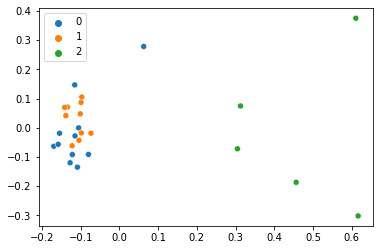

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(total_embedding)
embedding_pca = pca.transform(total_embedding)
plt.figure(figsize=(6,4))
sns.scatterplot(x=embedding_pca[:,0], y=embedding_pca[:,1], hue=hue_label)

[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 26 samples in 0.001s...
[t-SNE] Computed neighbors for 26 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.534313
[t-SNE] KL divergence after 1000 iterations: 0.463988


<AxesSubplot:>

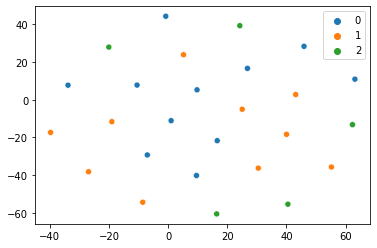

In [11]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
embedding_tsne = tsne.fit_transform(total_embedding)
plt.figure(figsize=(6,4))
sns.scatterplot(x=embedding_tsne[:,0], y=embedding_tsne[:,1], hue=hue_label)